**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "matrix.umap.cluster.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_merge = dat
print(dim(dat))
head(dat, 3)

[1] 87610   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.176196,39,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,-12.15321,-12.879920,20,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,-11.02704,-3.031374,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


## Visualize the top clusters

In [3]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster < 10, Cluster >= 0) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat)

[1] 61089   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:115429-115969,-11.027042,-3.031374,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:191204-191722,-21.781030,-13.901032,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:202166-202422,-21.719149,-13.832686,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:267910-268557,-29.426582,12.034660,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:605104-605675,-13.669258,-1.011601,3,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:778233-779389,-9.192992,2.744334,1,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


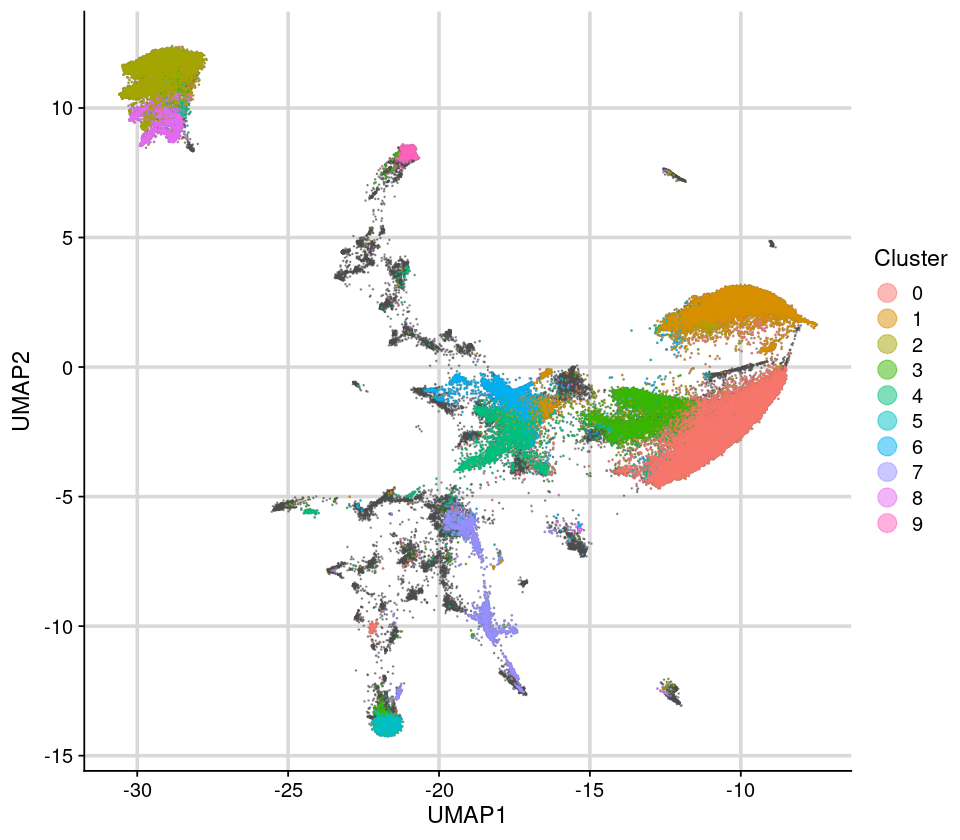

In [4]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) #+
    #theme(legend.position = "none")

gpt = gpt + guides(colour = guide_legend(override.aes = list(size=5)))

options(repr.plot.height = 7, repr.plot.width = 8)
print(gpt)

## Highlight single cluster

In [8]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == 2) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat)

[1] 9102  540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:267910-268557,-29.42658,12.034660,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:975975-976656,-28.35145,11.595084,2,0,1,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1032702-1033526,-11.24629,1.758257,2,1,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1249886-1251201,-29.19260,11.777773,2,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1788936-1789413,-30.04535,10.630426,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1906147-1906483,-28.06400,12.041151,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


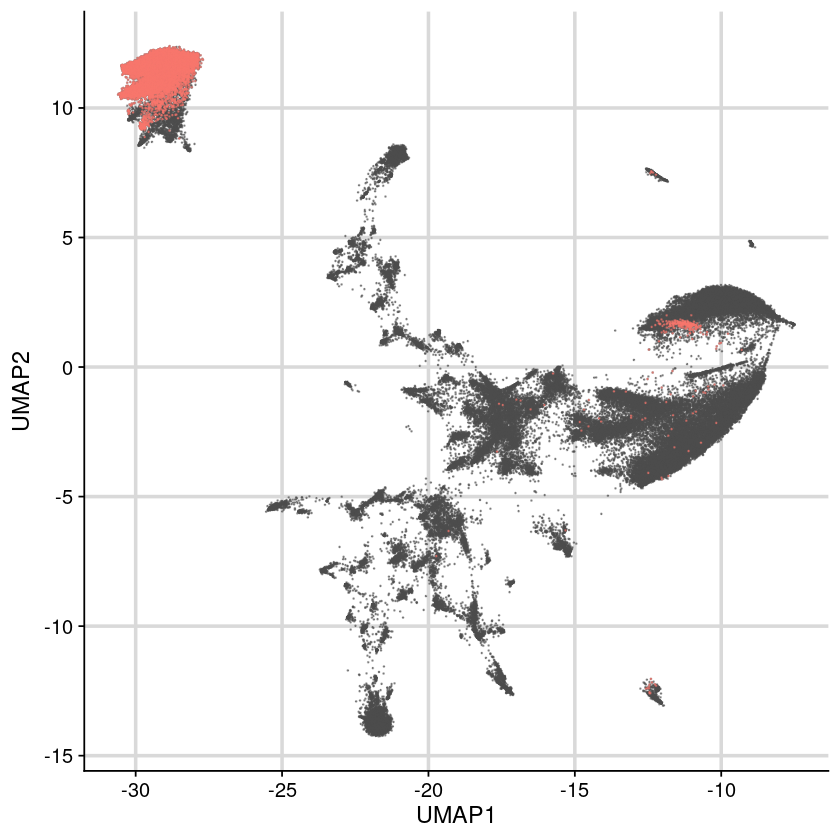

In [9]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

In [10]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == 8) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat)

[1] 2149  540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:912735-913419,-21.14227,1.423582,8,1,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1855508-1856285,-15.64652,-6.288355,8,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2107820-2109082,-28.64083,9.301962,8,0,1,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2139783-2140161,-29.17866,9.974215,8,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2840113-2840672,-28.66642,9.440121,8,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2875620-2876203,-28.58522,9.486398,8,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


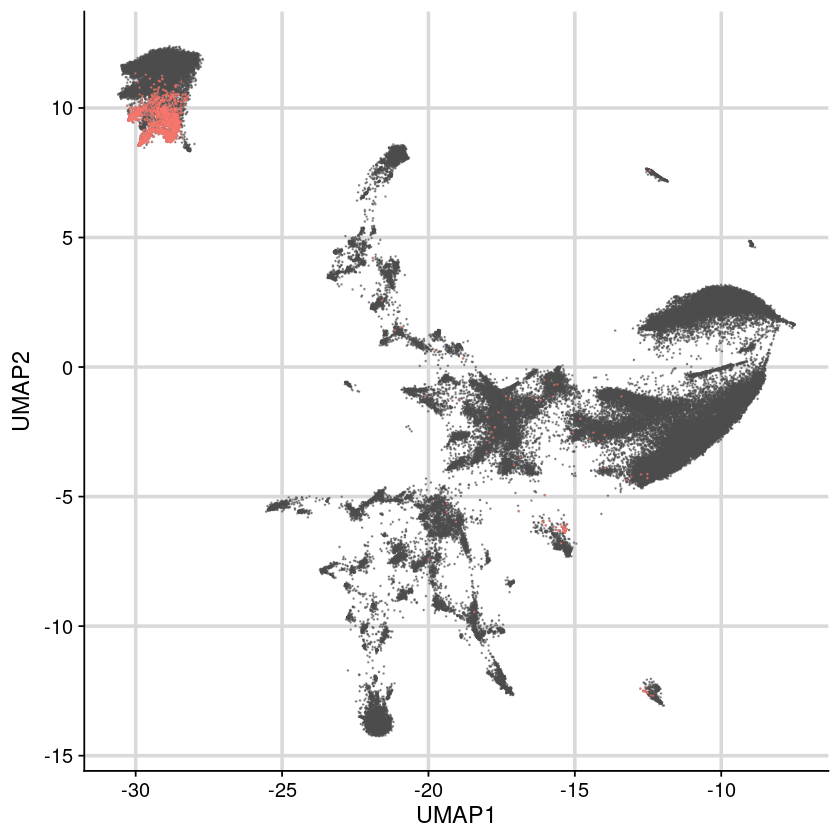

In [11]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

In [68]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == 1) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat, 3)

[1] 12718   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:778233-779389,-9.192992,2.744334,1,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:826796-828040,-10.227097,2.846299,1,0,1,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:903783-905204,-9.975954,2.100290,1,0,0,1,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0


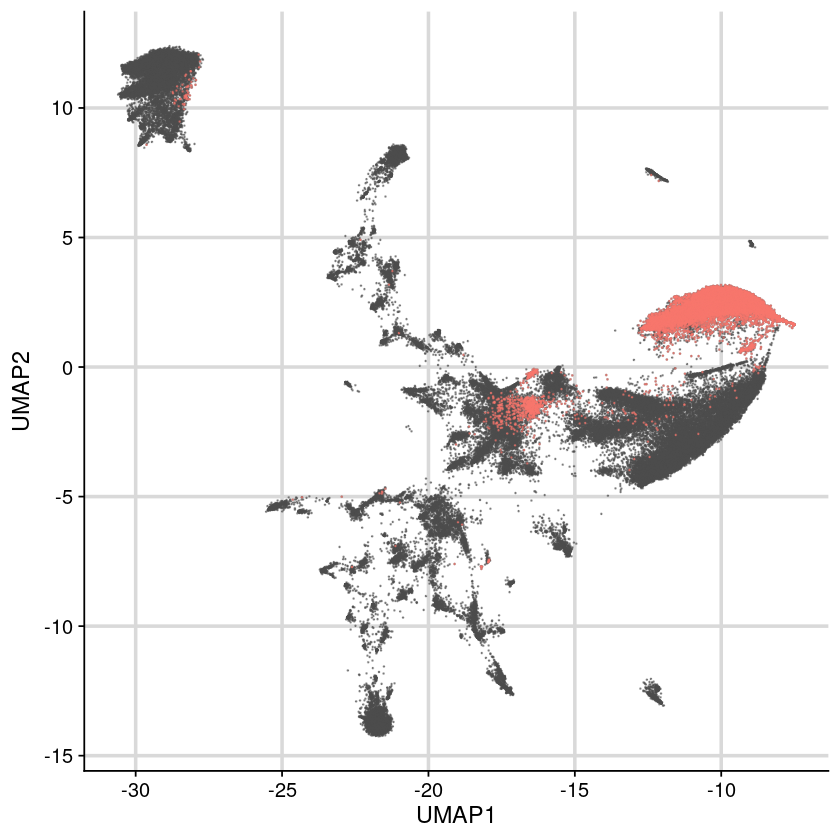

In [69]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

In [12]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == 5) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat, 3)

[1] 3406  540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:191204-191722,-21.78103,-13.90103,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:202166-202422,-21.71915,-13.83269,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2145471-2145641,-21.69567,-13.89292,5,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


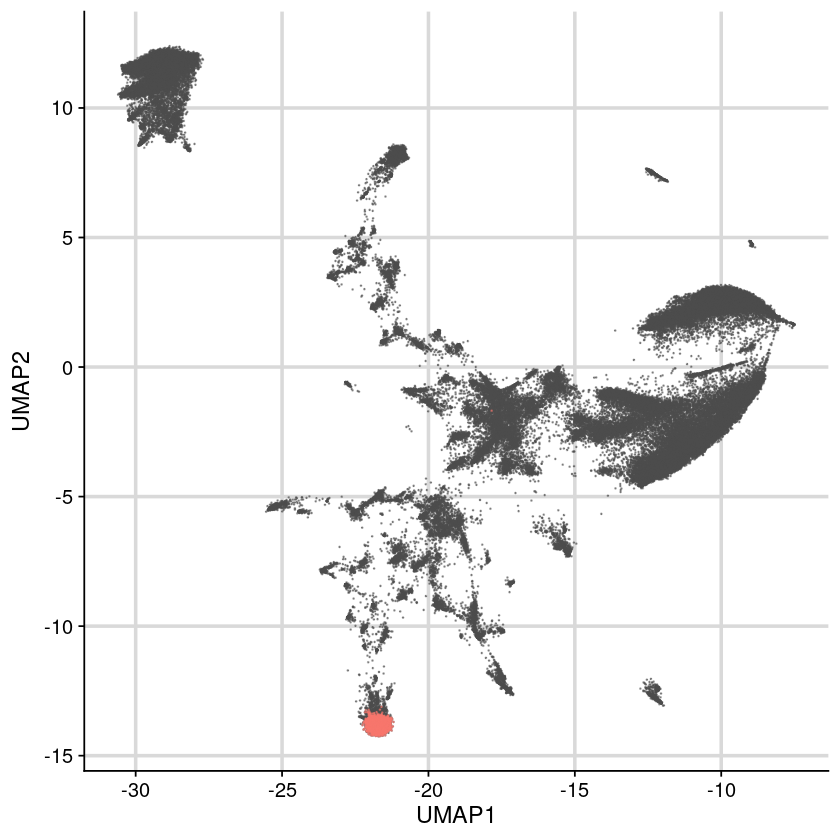

In [13]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

In [14]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster == 9) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat, 3)

[1] 2048  540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:864008-864343,-21.03317,8.279630,9,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2145903-2146689,-20.93500,8.170608,9,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:2623991-2624359,-21.08068,8.282812,9,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


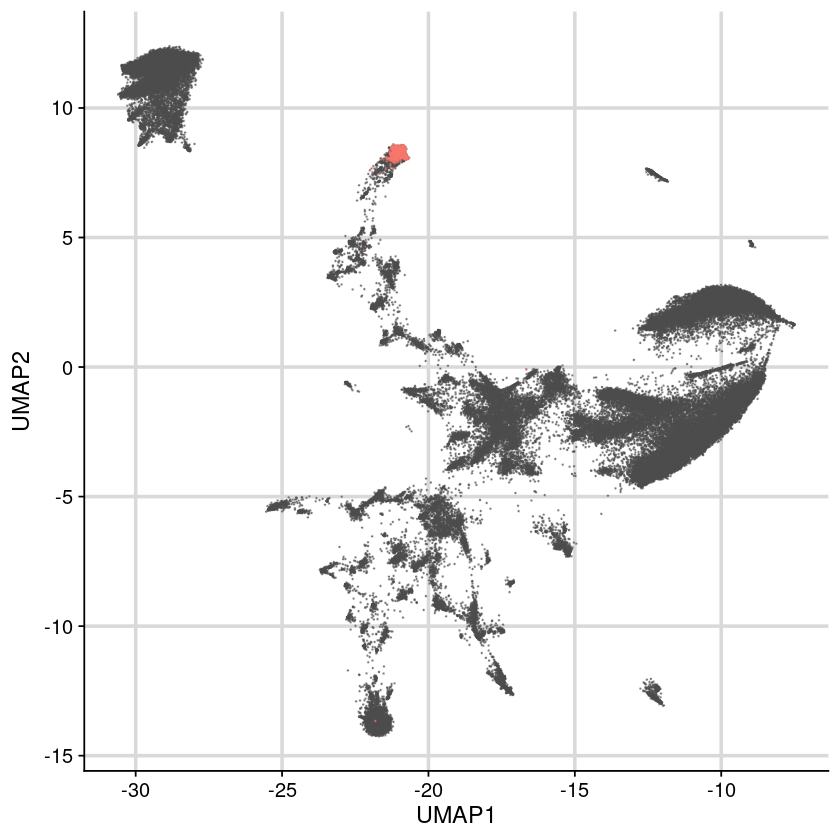

In [15]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

## Highlight CTCF, SMC3, RAD21

In [47]:
dat = dat_region_merge

tmp = dat %>% dplyr::filter(CTCF == 1)
dat_region_merge_sub_ctcf = tmp

tmp = dat %>% dplyr::filter(SMC3 == 1)
dat_region_merge_sub_smc3 = tmp

tmp = dat %>% dplyr::filter(RAD21 == 1)
dat_region_merge_sub_rad21 = tmp

tmp = dat %>% dplyr::filter(CTCF == 1, SMC3 == 1, RAD21 == 1)
dat_region_merge_sub_tot = tmp

print(dim(dat))

[1] 87610   540


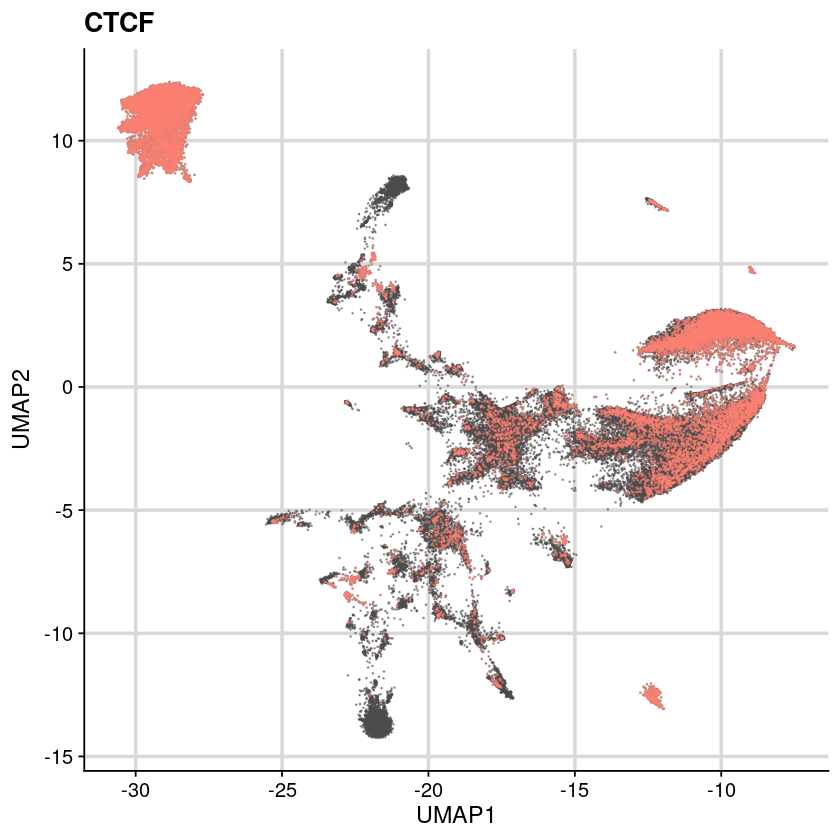

In [52]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub_ctcf
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30",  size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#fb8072", size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = "CTCF") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")
gpt_label_ctcf = gpt

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

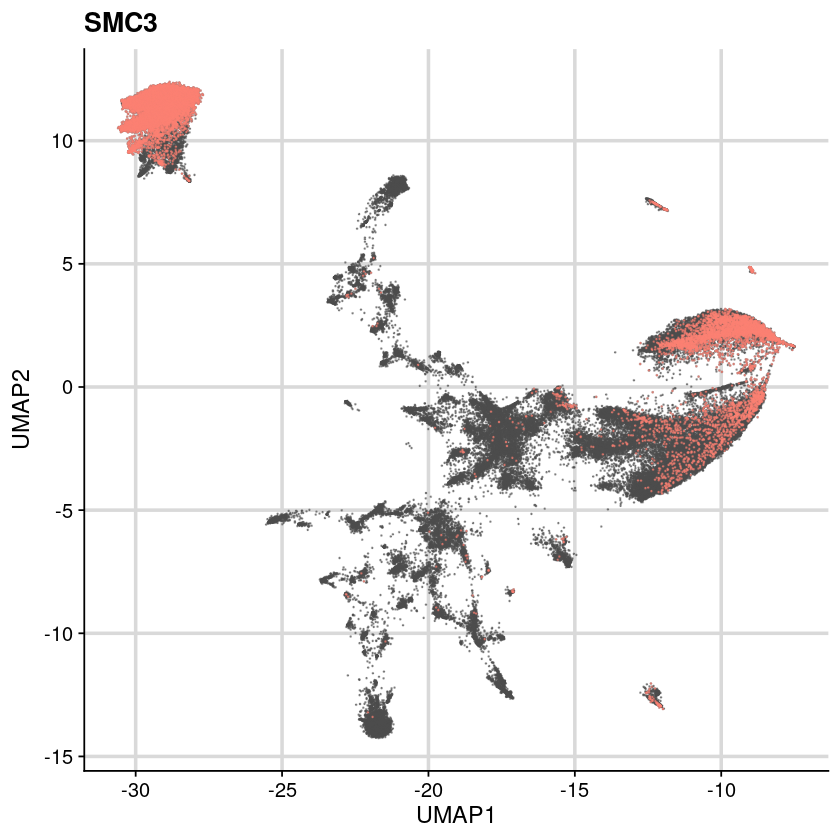

In [53]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub_smc3
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30",  size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#fb8072", size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = "SMC3") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")
gpt_label_smc3 = gpt

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

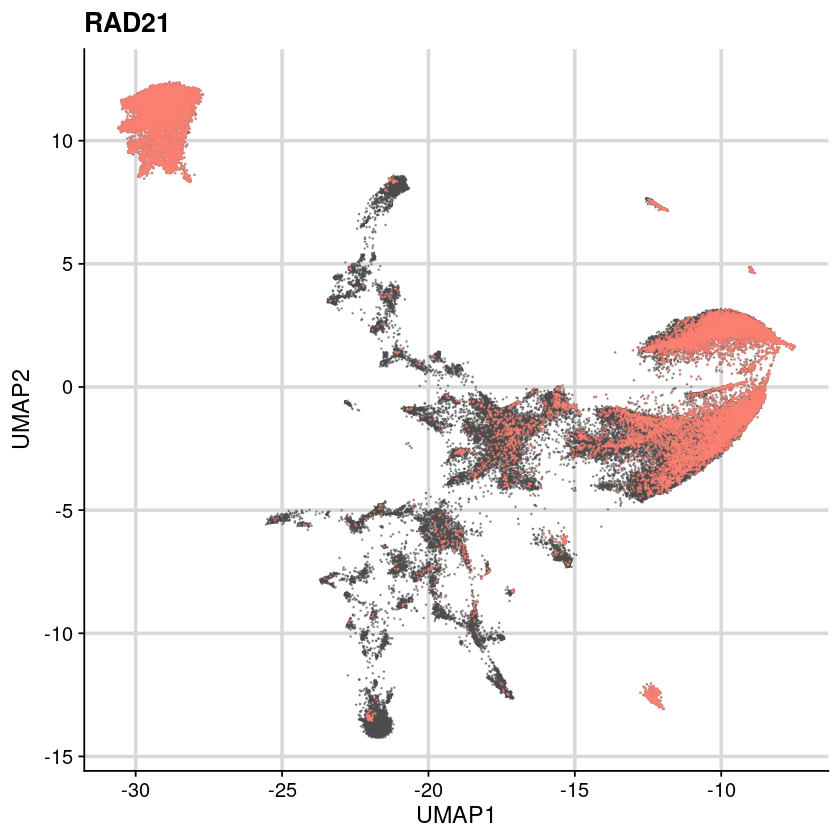

In [54]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub_rad21
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30",  size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#fb8072", size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = "RAD21") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")
gpt_label_rad21 = gpt

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

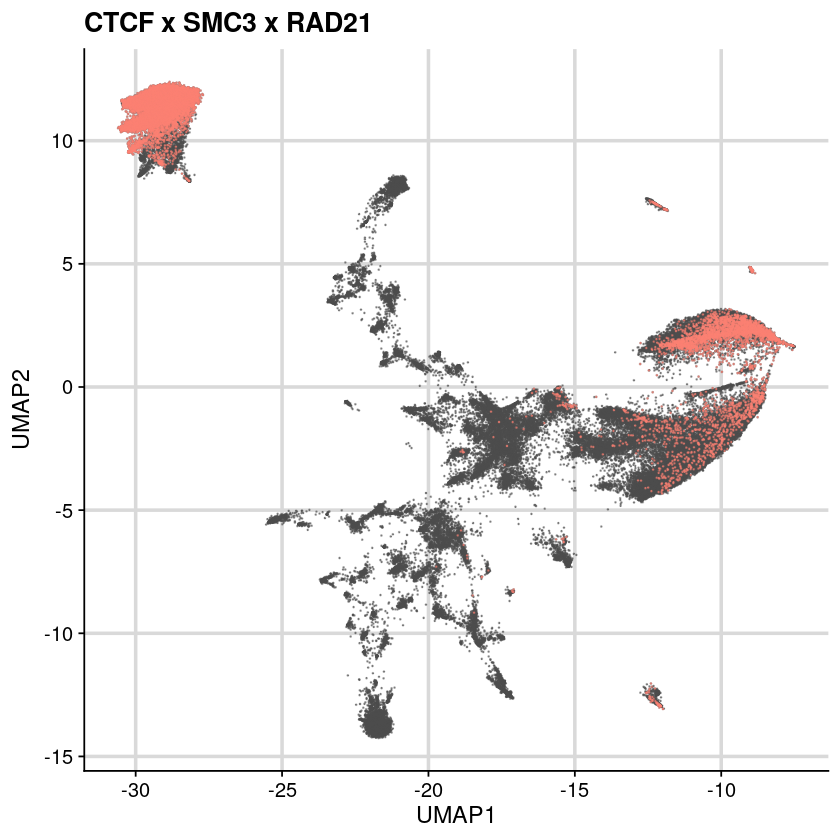

In [55]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub_tot
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30",  size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2), color="#fb8072", size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = "CTCF x SMC3 x RAD21") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")
gpt_label_tot = gpt

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

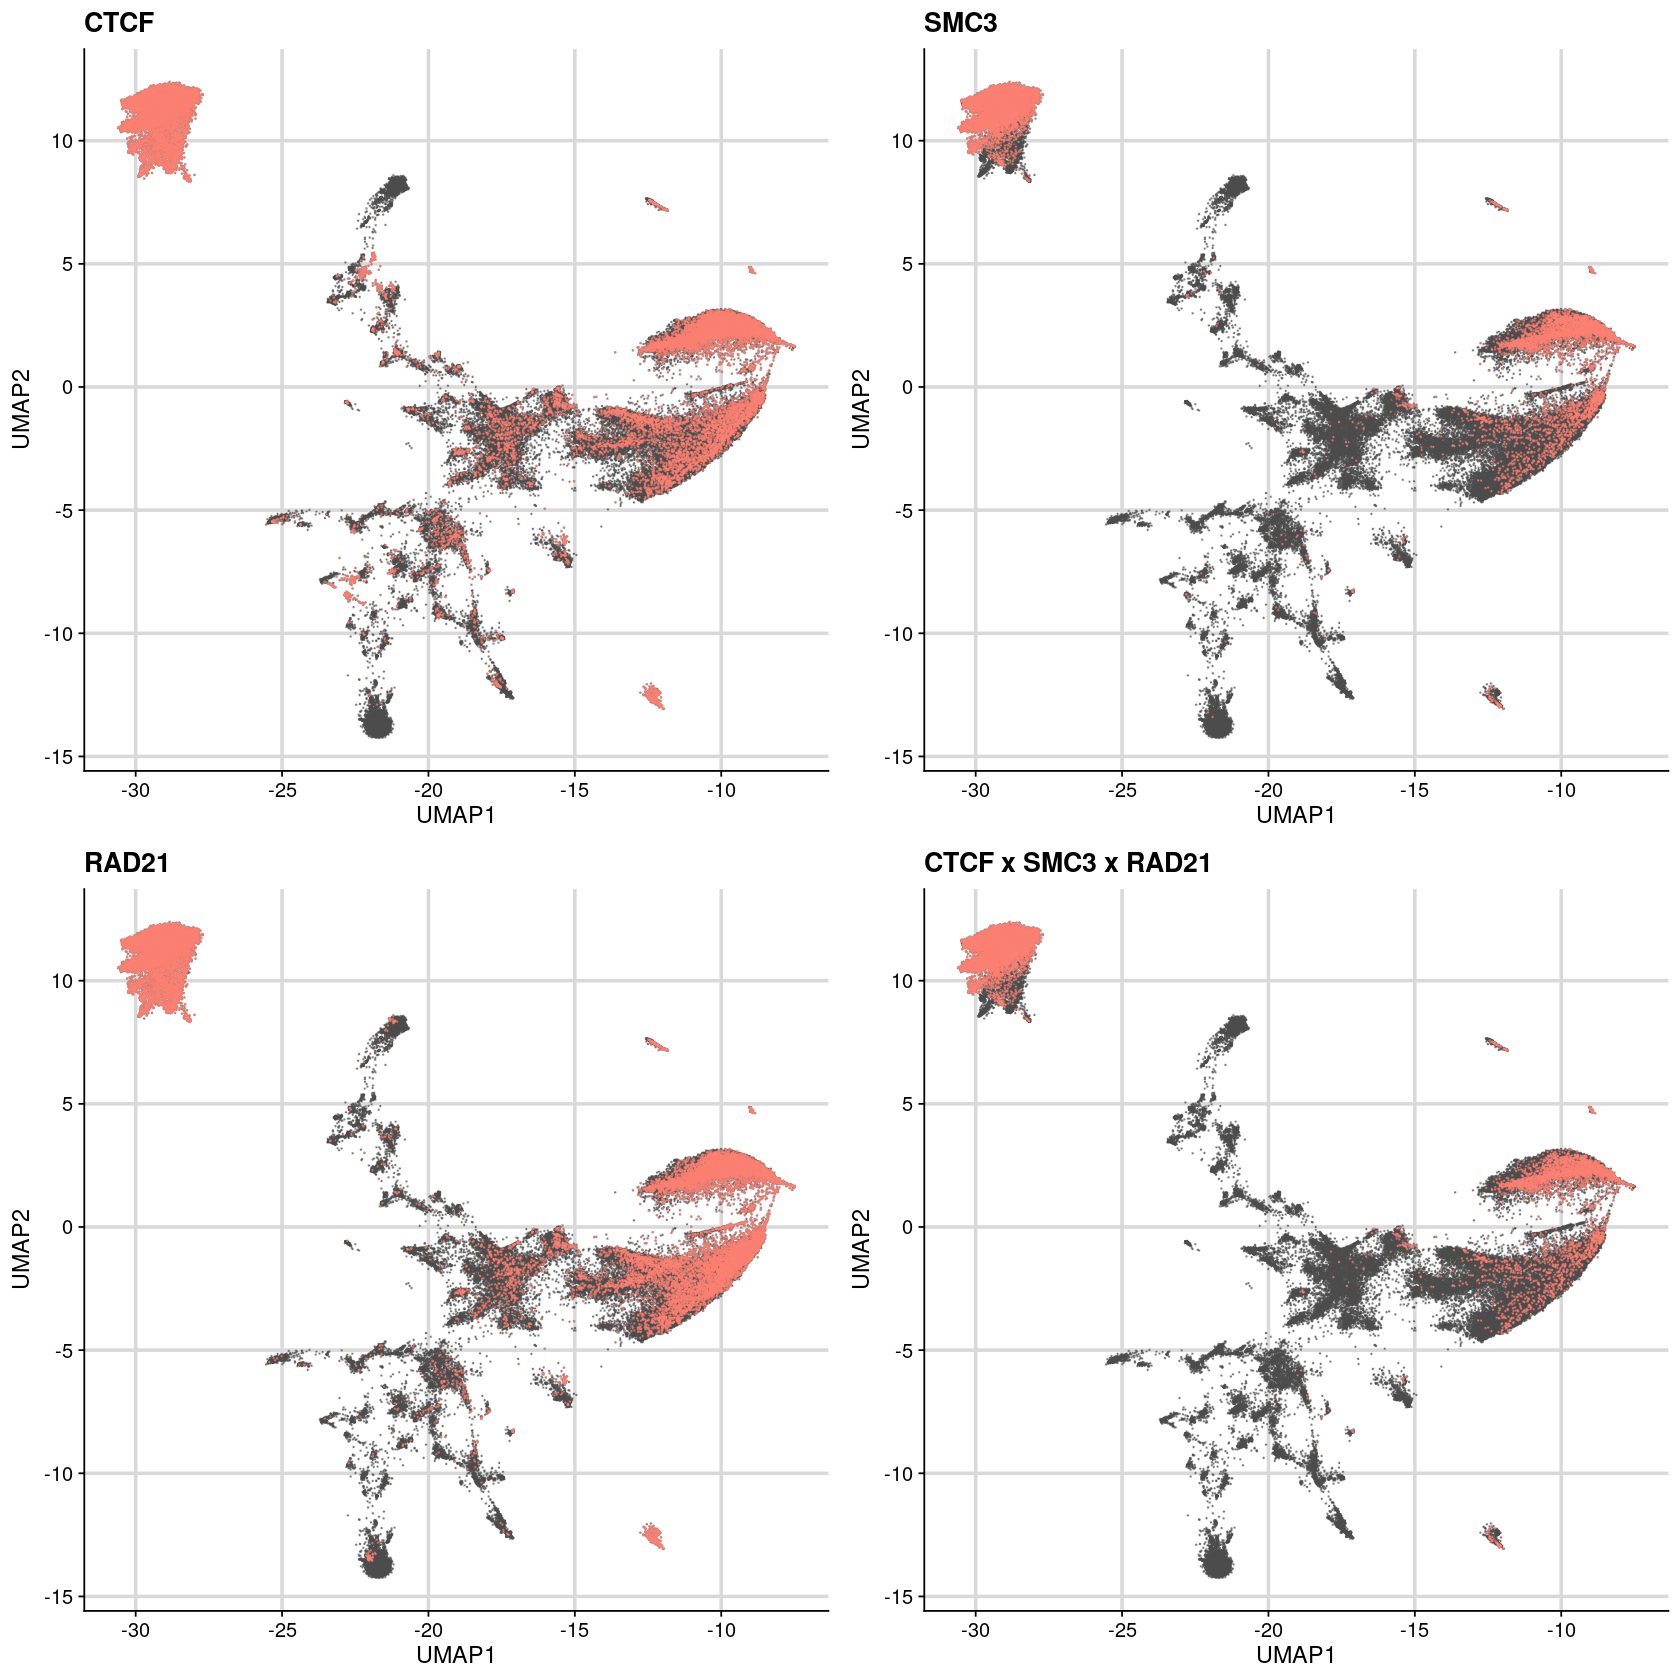

In [58]:
lst = list(gpt_label_ctcf, gpt_label_smc3, gpt_label_rad21, gpt_label_tot)
options(repr.plot.height = 14, repr.plot.width = 14)
plot_grid(
    plotlist = lst,
    ncol = 2
)